0.24.2


<Figure size 432x288 with 0 Axes>

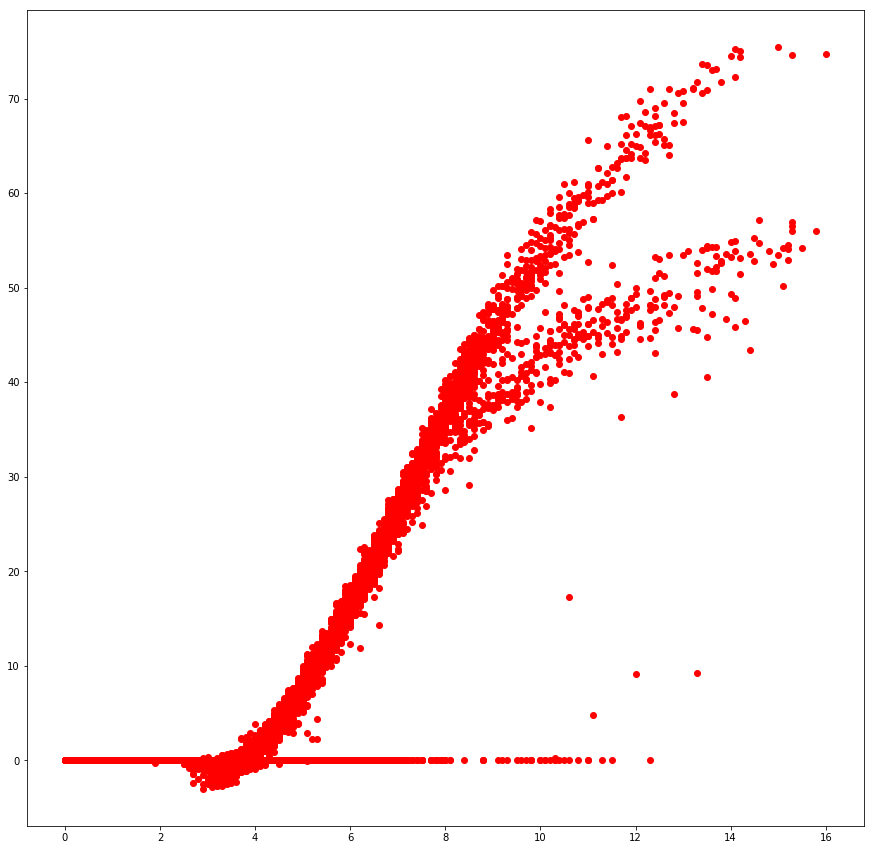

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(pd.__version__)
data1=pd.read_csv(r"C:\Users\Joe Auty\Documents\SURE\data\resureintro\data1.csv")
data2=pd.read_csv(r"C:\Users\Joe Auty\Documents\SURE\data\resureintro\data2.csv")
data3=pd.read_csv(r"C:\Users\Joe Auty\Documents\SURE\data\resureintro\data3.csv")
y3=data3['power_avg'];
x3=data3['windspeed_avg']
states=data3['turbine_state']
plt.figure()
plt.figure(figsize=(15,15))
plt.plot(x3,y3,'ro')
plt.show()

<Figure size 432x288 with 0 Axes>

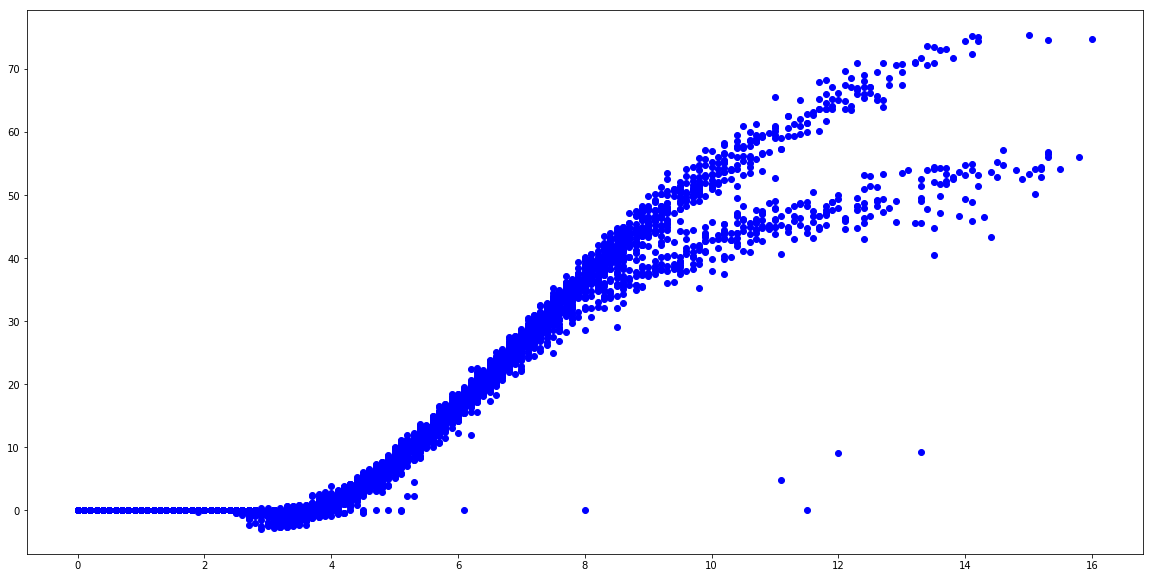

In [97]:
y3=data3['power_avg'];
x3=data3['windspeed_avg']
states=data3['turbine_state']
z=np.asarray(np.where(states!=0))
states_clean1=states[(states!=0)]


y3_cleaned=np.transpose(np.asarray([y3[i] for i in z]))
x3_cleaned=np.transpose(np.asarray([x3[i] for i in z]))

plt.figure()
plt.figure(figsize=(20,10))
plt.plot(x3_cleaned,y3_cleaned,'bo')
plt.show()


<Figure size 432x288 with 0 Axes>

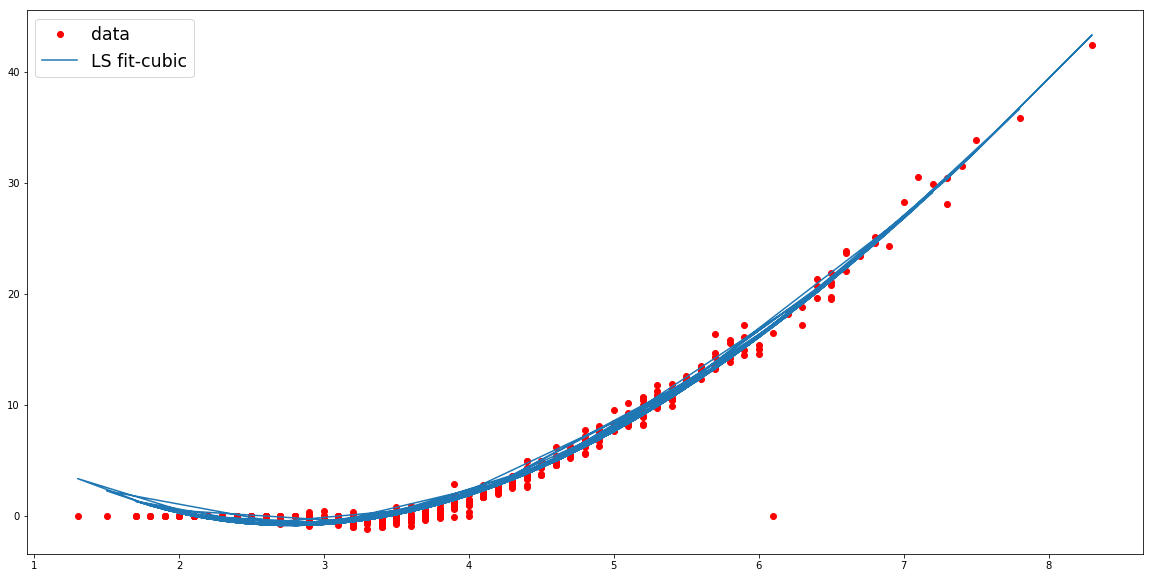

In [115]:
## selecting training data

plt.figure()
plt.figure(figsize=(20,10))
plt.plot(x3_cleaned[0:500],y3_cleaned[0:500],'ro',label='data')

#cubic 
N=500
xb=np.ones((500,4))
x=x3_cleaned[0:500]
y1=y3_cleaned[0:500]
xb[:,0]=(np.transpose(x))**3
xb[:,1]=(np.transpose(x))**2
xb[:,2]=np.transpose(x)


t=np.transpose(xb)
i=np.matmul(t,xb)
beta=np.matmul((np.linalg.inv(i)),(np.matmul(t,y1)))

y_hat=np.matmul(xb,beta)
x_plt=np.linspace(1,9,num=N)
plt.plot(x,y_hat,label='LS fit-cubic')
plt.legend(loc='upper left',fontsize='xx-large')
mse=np.mean((y1-y_hat)**2)
plt.show()





<Figure size 432x288 with 0 Axes>

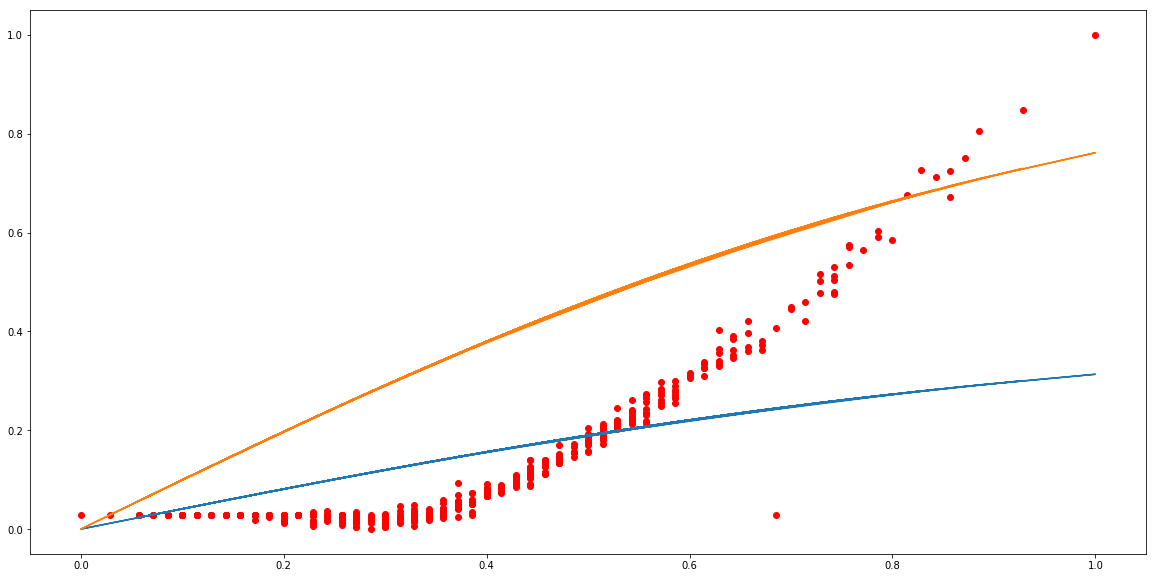

In [211]:
#tanh example

import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()

X=np.ones(N,)
x_train=x3_cleaned[0:500]
y_train=y3_cleaned[0:500]
x_train=scaler.fit_transform(x_train)
X=np.tanh(x_train)

#reshaping
X2=X.reshape((500,))
Y1=y_train.reshape((500,))


##using minmaxscaler 



Y=scaler.fit_transform(y_train)
#beta 
t_tanh=np.transpose(X)
i_tanh=np.matmul(t_tanh,X)
beta_tanh=np.matmul((np.linalg.inv(i_tanh)),(np.matmul(t_tanh,Y)))

y_hat_tanh=np.matmul(X,beta_tanh)

plt.figure()
plt.figure(figsize=(20,10))
plt.plot(x_train,Y,'ro',label='data')
plt.plot(x_train,y_hat_tanh,label='tanh LS fit')
plt.plot(x_train,np.tanh(x_train))
plt.show()

<Figure size 432x288 with 0 Axes>

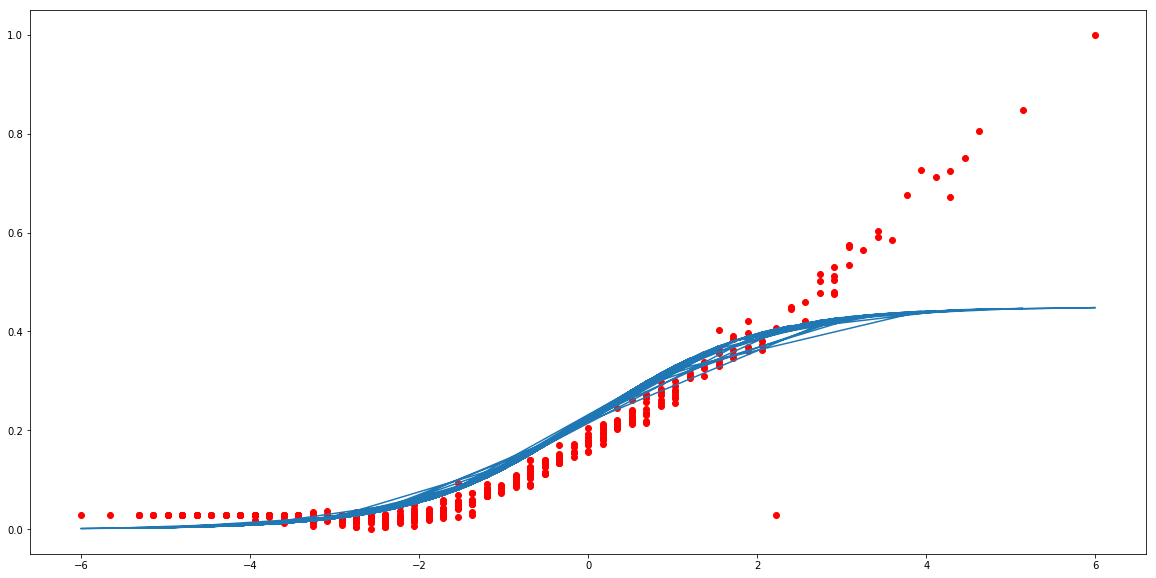

In [225]:
###sigmoid 


import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler(feature_range=(-6,6))
scaler2=MinMaxScaler()

x_train=x3_cleaned[0:500]
y_train=y3_cleaned[0:500]
x_train=scaler.fit_transform(x_train)
#X=(np.exp(x_train))/(1+np.exp(x_train))
X=(1)/(1+np.exp((-1)*(x_train-0)))

#reshaping
X2=X.reshape((500,))
Y1=y_train.reshape((500,))


Y=scaler2.fit_transform(y_train)
#beta 
t_sig=np.transpose(X)
i_sig=np.matmul(t_sig,X)
beta_sig=np.matmul((np.linalg.inv(i_sig)),(np.matmul(t_sig,Y)))

y_hat_sig=np.matmul(X,beta_sig)


#figure 
plt.figure()
plt.figure(figsize=(20,10))
plt.plot(x_train,Y,'ro')
plt.plot(x_train,y_hat_sig)
plt.show()

In [152]:
np.matmul(t_tanh,Y1)

array([2008.83555032])

In [154]:
print("hello world")

hello world


In [160]:
print(x_train)

[[4.4]
 [4. ]
 [3.9]
 [3.8]
 [3.9]
 [3.6]
 [4.1]
 [5.8]
 [5.3]
 [5.4]
 [6.4]
 [6.5]
 [7.3]
 [7.4]
 [8.3]
 [7.5]
 [6.4]
 [5.9]
 [6.4]
 [6.9]
 [5.8]
 [5.1]
 [4.6]
 [5.3]
 [7.1]
 [6.8]
 [6.3]
 [6.3]
 [5.4]
 [4.3]
 [4.9]
 [5.2]
 [5.2]
 [6.7]
 [7.8]
 [7.3]
 [6. ]
 [5.9]
 [5.3]
 [5.6]
 [5.6]
 [5.4]
 [5.1]
 [4.7]
 [5.3]
 [4.4]
 [4.8]
 [4.6]
 [4.8]
 [5.4]
 [5.1]
 [4.5]
 [4.2]
 [4.8]
 [4.2]
 [4.1]
 [5. ]
 [4.3]
 [3.8]
 [3.7]
 [4.1]
 [4.6]
 [4. ]
 [4.9]
 [4.6]
 [4.8]
 [4.9]
 [4.9]
 [4.9]
 [4.5]
 [5.4]
 [5.7]
 [4.5]
 [5. ]
 [4.9]
 [5.2]
 [5.3]
 [5.4]
 [5.1]
 [5.5]
 [5.3]
 [4.8]
 [6.2]
 [5.8]
 [5.4]
 [5.5]
 [5.2]
 [4.9]
 [4.4]
 [5. ]
 [5.1]
 [5. ]
 [5.6]
 [5. ]
 [4.5]
 [4.1]
 [3.9]
 [4.5]
 [4. ]
 [3.2]
 [3. ]
 [4. ]
 [4.6]
 [4.4]
 [4.2]
 [3.9]
 [4. ]
 [3.9]
 [3.3]
 [3.1]
 [2.2]
 [1.3]
 [1.8]
 [1.5]
 [2.8]
 [3. ]
 [3.5]
 [3.3]
 [3.3]
 [2.9]
 [2. ]
 [2.7]
 [2.6]
 [2.3]
 [2.6]
 [3.3]
 [2.7]
 [2.9]
 [2.5]
 [2.5]
 [2. ]
 [1.8]
 [1.7]
 [2.1]
 [1.9]
 [2.1]
 [3.1]
 [3.8]
 [4.4]
 [4.4]
 [4.5]
 [4.7]
 [4.7]